In [0]:
import pandas as pd
import io
import math
import numpy as np
from sklearn.model_selection import train_test_split


In [0]:
df = pd.read_csv(r'essay_data.csv',encoding='latin-1')

# Dataset is now stored in a Pandas Dataframe

In [0]:
#df.head()

In [0]:
data = df[['essay_id','essay_set','essay','domain1_score']].copy()

In [0]:
data = data.dropna() #drop all NaN values
data

,essay_id,essay_set,essay,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",8.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",8.0
...,...,...,...,...
504,507,1,"Dear local newspaper, I strongly think that ma...",10.0
505,508,1,"Dear @CAPS1, @CAPS2 since electricity was inve...",9.0
506,509,1,"Dear editor of local newspaper, @CAPS1 you kno...",11.0
507,510,1,"Dear, @CAPS1 Computers do have positive effect...",7.0


In [0]:
#check details of the data
data['essay'].apply(len).describe()

count     509.000000
mean     2041.404715
std       711.074374
min        47.000000
25%      1589.000000
50%      2036.000000
75%      2492.000000
max      4216.000000
Name: essay, dtype: float64

In [0]:
#Visualize the Data

In [0]:
import matplotlib.pyplot as plt 

(0.0, 70.0)

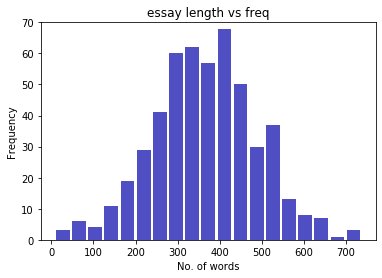

In [0]:
x = [len(w.split()) for w in data['essay']]  #store no of words of each essay in a list


n, bins, patches = plt.hist(x=x, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)  #histogram plot
#plt.grid(axis='y', alpha=0.75)
plt.xlabel('No. of words')
plt.ylabel('Frequency')
plt.title('essay length vs freq')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [0]:
#Pre - Process Shits to be done 
"""
1. clear out all punctuations
2. remove worlds starting with @CAPS...
3. 
"""

In [0]:
#remove all punctuations
data_ = [
    [(word.replace(",", "")
          .replace(".", "")
          .replace("(", "")
          .replace(")", "")
          .replace("@", "")
          .replace("?", "")
          .replace("!", "")
          .replace(":", ""))
    for word in row.lower().split()]
    for row in data['essay']]

In [0]:
#restore words to sentences

str1=""
essay_d=[]
for d in data_:
  #print(d)
  for i in d:
    str1 = str1 + i + " "
  essay_d.append(str1)
  str1=""

In [0]:
essay_d[1]

"dear caps1 caps2 i believe that using computers will benefit us in many ways like talking and becoming friends will others through websites like facebook and mysace using computers can help us find coordibates locations and able ourselfs to millions of information also computers will benefit us by helping with jobs as in planning a house plan and typing a num1 page report for one of our jobs in less than writing it now lets go into the wonder world of technology using a computer will help us in life by talking or making friends on line many people have myspace facebooks aim these all benefit us by having conversations with one another many people believe computers are bad but how can you make friends if you can never talk to them i am very fortunate for having a computer that can help with not only school work but my social life and how i make friends computers help us with finding our locations coordibates and millions of information online if we didn't go on the internet a lot we wo

In [0]:
new_data = pd.DataFrame(list(zip(essay_d,data['domain1_score'])),columns = ['Essay','Score'])

In [0]:
#shuffle the dataset before splitting
from sklearn.utils import shuffle
new_data1 = shuffle(new_data)

In [0]:
train = new_data1.sample(frac=0.8)
new_data1.drop(train.index, axis=0, inplace=True)
valid = new_data1.sample(frac=0.5)
new_data1.drop(valid.index, axis=0, inplace=True)
test = new_data1
train.shape , test.shape , valid.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


((407, 2), (51, 2), (51, 2))

In [0]:
train , test

(                                                 Essay  Score
 102  dear local newspaper have you ever been runnin...    9.0
 285  dear computer co computers have a negative eff...    4.0
 424  to the organization1 can be a big part mof peo...   11.0
 6    did you know that more and more people these d...   10.0
 258  as time goes on our society becomes more advan...    9.0
 ..                                                 ...    ...
 218  dear newspaper caps1 has lately come to my att...    9.0
 469  organization1 caps1 technology majors support ...   12.0
 404  i believe computers have a positive effect on ...    8.0
 462  computers computers computers who doesn't own ...    8.0
 471  do you like going on the computer well after y...    6.0
 
 [407 rows x 2 columns],
                                                  Essay  Score
 385  almost everyone is effected by computers in so...    7.0
 443  dear location1 caps1 i strongly believe that p...   10.0
 104  computers are used wor

In [0]:
def return_data(df):
  return list(df['Essay']), np.array(df['Score'])


# Apply it to the three splits
train_essay, train_score = return_data(train)
valid_essay, valid_score = return_data(valid)
test_essay, test_score = return_data(test)
train_essay[0], train_score[0]

("dear local newspaper i agree that computers have a positive effect on people you learn hand - eye coordination you don't have to step out to go to the library and it can improve social skills continue reading to find out why computers we use them everyday they are teaching us something we month1 not even realize it but they are teaching us hand-eye coordination we type something and we use our eyes to look at the screen and then our hands to type one mistake and automatically our hand fix it or maybe when we are playing games online the same thing applies our eyes are looking while our hands are fast at work over the keyboard hand-eye coordination is a skill you need on sports and i believe that computers since we spend time on them are the quick way to learn that skill next how many student's parents work my parents do something it becomes difficult to walk to the library not everyone lives in walking distance to one that's when a computer helps if you have a project to do but your 

In [0]:

# Maximum vocabulary size used for tokenization
TOP_K = 50000 
# Sentences will be truncated/padded to this length
MAX_SEQUENCE_LENGTH = 800

In [0]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence,text

In [0]:

# Create a vocabulary from training corpus
tokenizer = text.Tokenizer(num_words=TOP_K)
tokenizer.fit_on_texts(train_essay)

In [0]:
train_essay[20] , train_score[20]

("every where you look people are using computers just about everyone has one some say that computers are bad for you but they can really benefit society computers are used for research socializing and almost all of our caps1 work is done on computers one of the main things that computers provide is research information if you want to find out anything you can find it on the internet it is an efficient way to study or find information for school before the internet and computers it would take weeks to find enough information for a paper or business work this was because all information was found in books books did not always give you the information you needed whatever was written was all you got because of saearch engines and websites you can type in whatever you want to look up it is much easier to log onto a computer and type in a question than search an entire book to find an answer computers are the best way to research a topic computers are also used to socialize you can chat wit

In [0]:
len(train_essay) , len(test_essay)

(407, 102)

In [0]:
# Preprocess the train, validation and test sets
# Tokenize and pad sentences
preproc_train = tokenizer.texts_to_sequences(train_essay)
preproc_train = sequence.pad_sequences(preproc_train, maxlen=MAX_SEQUENCE_LENGTH)
preproc_valid = tokenizer.texts_to_sequences(valid_essay)
preproc_valid = sequence.pad_sequences(preproc_valid, maxlen=MAX_SEQUENCE_LENGTH)
preproc_test = tokenizer.texts_to_sequences(test_essay)
preproc_test = sequence.pad_sequences(preproc_test, maxlen=MAX_SEQUENCE_LENGTH)

In [0]:
print(len(preproc_train[0]))
print(len(preproc_train[10]))

print(len(preproc_train))
print(len(preproc_test))
print(len(preproc_valid))

800
800
407
51
51


In [0]:
!gsutil cp gs://cloud-training-demos/courses/machine_learning/deepdive/09_sequence/text_classification/glove.6B.200d.txt glove.6B.200d.txt

Copying gs://cloud-training-demos/courses/machine_learning/deepdive/09_sequence/text_classification/glove.6B.200d.txt...
/ [1 files][661.3 MiB/661.3 MiB]   35.7 MiB/s                                   
Operation completed over 1 objects/661.3 MiB.                                    


In [0]:
# Specify the hyperparameters
filters=64
dropout_rate=0.2
embedding_dim=200
kernel_size=3
pool_size=3
word_index=tokenizer.word_index
embedding_path = 'glove.6B.200d.txt'
embedding_dim=200   #the output dimension from the embedding layer to be fed to the next layer 

In [0]:
#word_index

In [0]:
def get_embedding_matrix(word_index, embedding_path, embedding_dim):
  embedding_matrix_all = {}
  with open(embedding_path) as f:
    for line in f:  # Every line contains word followed by the vector value
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_matrix_all[word] = coefs

        
# Prepare embedding matrix with just the words in our word_index dictionary
  num_words = min(len(word_index) + 1, TOP_K)
  embedding_matrix = np.zeros((num_words, embedding_dim))
  for word, i in word_index.items():
    if i >= TOP_K:
        continue
    embedding_vector = embedding_matrix_all.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
  
  return embedding_matrix

In [0]:
from keras.layers import Embedding, LSTM, Dense, Dropout, Lambda, Flatten
from keras.models import Sequential, load_model, model_from_config
import keras.backend as K

In [0]:
# Create model instance
model = Sequential()
num_features = min(len(word_index) + 1, TOP_K)
# Add embedding layer - GloVe embeddings
model.add(Embedding(input_dim=num_features,
              output_dim=embedding_dim,
              input_length=MAX_SEQUENCE_LENGTH,
              weights=[get_embedding_matrix(word_index, 
                              embedding_path, embedding_dim)],
              trainable=True))



#Add more layers

model.add(LSTM(200, dropout=0.4, recurrent_dropout=0.4, input_shape=[1, 200], return_sequences=True))
model.add(LSTM(64, recurrent_dropout=0.4))
model.add(Dropout(0.5))
model.add(Dense(1, activation='relu'))

model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mae'])
model.summary()



Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 800, 200)          1425000   
_________________________________________________________________
lstm_9 (LSTM)                (None, 800, 200)          320800    
_________________________________________________________________
lstm_10 (LSTM)               (None, 64)                67840     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 1,813,705
Trainable params: 1,813,705
Non-trainable params: 0
_________________________________________________________________


In [0]:
len(preproc_train) , len(preproc_test)

(407, 102)

In [0]:
H = model.fit(preproc_train,
         train_score,
         validation_data=(preproc_valid, valid_score),
         batch_size=128,
         epochs=20,
         verbose=1)

Train on 407 samples, validate on 51 samples
Epoch 1/20
407/407 [==============================] - 22s 55ms/step - loss: 45.3034 - mean_absolute_error: 6.2942 - val_loss: 2.3144 - val_mean_absolute_error: 1.1919
Epoch 2/20
407/407 [==============================] - 18s 45ms/step - loss: 5.1128 - mean_absolute_error: 1.8424 - val_loss: 1.9562 - val_mean_absolute_error: 1.0603
Epoch 3/20
407/407 [==============================] - 18s 45ms/step - loss: 4.4723 - mean_absolute_error: 1.6338 - val_loss: 2.1215 - val_mean_absolute_error: 1.1496
Epoch 4/20
407/407 [==============================] - 18s 45ms/step - loss: 4.1193 - mean_absolute_error: 1.6061 - val_loss: 2.1838 - val_mean_absolute_error: 1.1730
Epoch 5/20
407/407 [==============================] - 18s 44ms/step - loss: 4.2448 - mean_absolute_error: 1.6345 - val_loss: 1.9084 - val_mean_absolute_error: 1.0206
Epoch 6/20
407/407 [==============================] - 18s 44ms/step - loss: 4.2873 - mean_absolute_error: 1.6413 - val_loss:

In [0]:
y_pred = model.predict(preproc_test)



In [0]:
y_pred

array([[8.095209 ],
       [8.213239 ],
       [8.212238 ],
       [8.237536 ],
       [8.082726 ],
       [8.09371  ],
       [8.156872 ],
       [8.22778  ],
       [7.938747 ],
       [8.293181 ],
       [8.101501 ],
       [8.289715 ],
       [8.199883 ],
       [8.076947 ],
       [8.07477  ],
       [8.21972  ],
       [8.1118555],
       [8.078442 ],
       [8.194707 ],
       [8.102744 ],
       [8.2219715],
       [8.034906 ],
       [8.173407 ],
       [8.208634 ],
       [8.211171 ],
       [8.013117 ],
       [8.194101 ],
       [8.2051325],
       [7.9890704],
       [8.156827 ],
       [8.026953 ],
       [8.16787  ],
       [8.272773 ],
       [7.9579453],
       [8.2128105],
       [8.132084 ],
       [8.173044 ],
       [8.105136 ],
       [8.019548 ],
       [8.193126 ],
       [8.020308 ],
       [8.25285  ],
       [8.281563 ],
       [8.26177  ],
       [8.114585 ],
       [8.172244 ],
       [7.9605565],
       [8.166582 ],
       [8.08457  ],
       [8.09418  ],


In [0]:
y_pred

array([[8.663229 ],
       [8.705473 ],
       [8.67513  ],
       [8.701564 ],
       [8.678781 ],
       [8.655418 ],
       [8.705394 ],
       [8.677866 ],
       [8.596626 ],
       [8.722103 ],
       [8.680925 ],
       [8.707084 ],
       [8.672893 ],
       [8.683405 ],
       [8.682431 ],
       [8.688066 ],
       [8.670352 ],
       [8.62567  ],
       [8.70251  ],
       [8.67434  ],
       [8.6909685],
       [8.641421 ],
       [8.7036085],
       [8.718171 ],
       [8.691477 ],
       [8.657119 ],
       [8.674844 ],
       [8.698331 ],
       [8.645318 ],
       [8.683467 ],
       [8.650198 ],
       [8.682765 ],
       [8.700021 ],
       [8.622052 ],
       [8.676643 ],
       [8.667711 ],
       [8.672179 ],
       [8.666583 ],
       [8.634212 ],
       [8.693568 ],
       [8.627288 ],
       [8.712384 ],
       [8.698703 ],
       [8.698049 ],
       [8.660689 ],
       [8.673818 ],
       [8.623857 ],
       [8.698941 ],
       [8.6648445],
       [8.672067 ],


In [0]:
loss, accuracy = model.evaluate(preproc_test,test_score)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

51/51 [==============================] - 1s 15ms/step
Loss:  2.8605513689564726
Accuracy:  1.1328482137006872


#Previous Approaches

In [0]:
from gensim.models import Word2Vec , KeyedVectors
import nltk


In [0]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
essay_vec = [nltk.word_tokenize(i) for i in data['essay']]

In [0]:
print(data['essay'][0])
print(essay_vec[0])


Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so question about the economy

In [0]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
X=data['essay'].values
Y=data['domain1_score'].values
#encoder=LabelEncoder()
#Y=encoder.fit_transform(Y)
#Y=to_categorical(Y)
tokenizer = Tokenizer(num_words=2500,split=' ')
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X)

In [0]:
len(X[20])

978

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [0]:
Y.shape

(12978,)

# Vectorizing the DataSet

In [0]:
data_ = [
    [(word.replace(",", "")
          .replace(".", "")
          .replace("(", "")
          .replace(")", ""))
    for word in row.lower().split()]
    for row in data['essay']]
  

In [0]:
len(data_[10])

325

In [0]:
def computeReviewTFDict(essay):
    #Counts the number of times the word appears in an essay
    reviewTFDict = {}
    for word in essay:
        if word in reviewTFDict:
            reviewTFDict[word] += 1
        else:
            reviewTFDict[word] = 1
    #Computes tf for each word           
    for word in reviewTFDict:
        reviewTFDict[word] = reviewTFDict[word] / len(essay)
    return reviewTFDict

In [0]:
#Computing TF

tfdict = []
for essay in data_:
  tfdict.append(computeReviewTFDict(essay))

In [0]:
tfdict[0]

{'-': 0.0029585798816568047,
 '@caps1': 0.0029585798816568047,
 '@caps2': 0.0029585798816568047,
 "@date1's": 0.0029585798816568047,
 '@organization1': 0.0029585798816568047,
 '@organization2': 0.0029585798816568047,
 'a': 0.020710059171597635,
 'about': 0.020710059171597635,
 'about!': 0.0029585798816568047,
 'agree': 0.0029585798816568047,
 'all': 0.0029585798816568047,
 'always': 0.0029585798816568047,
 'and': 0.011834319526627219,
 'are': 0.0029585798816568047,
 'ask': 0.0029585798816568047,
 'at': 0.005917159763313609,
 'be': 0.0029585798816568047,
 'because': 0.011834319526627219,
 'bed': 0.0029585798816568047,
 'being': 0.008875739644970414,
 'believe': 0.005917159763313609,
 'better': 0.0029585798816568047,
 'books': 0.0029585798816568047,
 'boss': 0.0029585798816568047,
 'buisness': 0.0029585798816568047,
 'but': 0.0029585798816568047,
 'by': 0.0029585798816568047,
 'can': 0.0029585798816568047,
 'cause': 0.0029585798816568047,
 'chat': 0.011834319526627219,
 'chatting': 0.002

In [0]:
#Computing IDF

def computeCountDict():
    """ Returns a dictionary whose keys are all the unique words in
    the dataset and whose values count the number of reviews in which
    the word appears.
    """
    countDict = {}
    # Run through each review's tf dictionary and increment countDict's (word, doc) pair
    for essay in tfdict:
        for word in essay:
            if word in countDict:
                countDict[word] += 1
            else:
                countDict[word] = 1
    return countDict

#Stores the review count dictionary
countDict = computeCountDict()




In [0]:
countDict['hello']

39

In [0]:
def computeIDFDict():
    """ Returns a dictionary whose keys are all the unique words in the
    dataset and whose values are their corresponding idf.
    """
    idfDict = {}
    for word in countDict:
        idfDict[word] = math.log(len(data) / countDict[word])
    return idfDict
  
#Stores the idf dictionary
idfDict = computeIDFDict()

In [0]:
#idfDict["hello"]

In [0]:
def computeReviewTFIDFDict(reviewTFDict):
    """ Returns a dictionary whose keys are all the unique words in the
    review and whose values are their corresponding tfidf.
    """
    reviewTFIDFDict = {}
    #For each word in the review, we multiply its tf and its idf.
    for word in reviewTFDict:
        reviewTFIDFDict[word] = reviewTFDict[word] * idfDict[word]
    return reviewTFIDFDict

#Stores the TF-IDF dictionaries
tfidfDict = [computeReviewTFIDFDict(review) for review in tfdict]

In [0]:
#tfidfDict[0]

In [0]:
 # Create a list of unique words
wordDict = sorted(countDict.keys())

def computeTFIDFVector(review):
     tfidfVector = [0.0] * len(wordDict)
     
     # For each unique word, if it is in the review, store its TF-IDF value.
     for i, word in enumerate(wordDict):
         if word in review:
             tfidfVector[i] = review[word]
     return tfidfVector

tfidfVector = [computeTFIDFVector(review) for review in tfidfDict]

In [0]:
len(wordDict)

54226

In [0]:

for i in range(len(data['essay'])):


In [0]:
"""
for i in tfidfVector[10]:
  if i != 0:
    print (i) """

'\nfor i in tfidfVector[10]:\n  if i != 0:\n    print (i) '

In [0]:
#countDict

# Set Test & Train Datasets

In [0]:
scores = np.array(df['domain1_score'])
#scores

In [0]:
essay_vectorized = np.array(tfidfVector)
essay_vectorized = np.reshape(essay_vectorized, (essay_vectorized.shape[0], 1, essay_vectorized.shape[1]))

In [0]:
print(essay_vectorized[20].shape)
print(essay_vectorized[20])

(1, 54226)
[[0. 0. 0. ... 0. 0. 0.]]


In [0]:
X_train, X_test, y_train, y_test = train_test_split(essay_vectorized, scores, test_size = 0.3)

In [0]:
print("Train Data !")
print("X ->",len(X_train))
print("Y ->",len(y_train))


print("Test Data !")
print("X ->",len(X_test))
print("Y ->",len(y_test))


Train Data !
X -> 9084
Y -> 9084
Test Data !
X -> 3894
Y -> 3894


# MODEL

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers




#import tensorflow_docs as tfdocs
#import tensorflow_docs.plots
#import tensorflow_docs.modeling

In [0]:
from keras.layers import Embedding, LSTM, Dense, Dropout, Lambda, Flatten
from keras.models import Sequential, load_model, model_from_config
import keras.backend as K

In [0]:
input_size = 2500

In [0]:
X_train[0].shape


(1, 978)

In [0]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [0]:
def build_model():
    """Define the model."""
    model = Sequential()
    #model.add(Embedding(input_size,300))
    #model.add(GlobalAveragePooling1D())
    model.add(LSTM(978, dropout=0.4, recurrent_dropout=0.4, input_shape=[1, 978], return_sequences=True))
    model.add(LSTM(64, recurrent_dropout=0.4))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='relu'))

    model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mae'])
    model.summary()

    return model

In [0]:
model = build_model()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 1, 978)            7655784   
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                267008    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 7,922,857
Trainable params: 7,922,857
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 1, 978)            7655784   
______________________

In [0]:
history=model.fit(X_train,y_train,epochs=100,batch_size=64)

Epoch 1/100
2112/9084 [=====>........................] - ETA: 18s - loss: nan - mean_absolute_error: nan

KeyboardInterrupt: ignored

In [0]:
y_pred = model.predict(X_test)
np.around(y_pred)
loss, accuracy = model.evaluate(test_batches)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

In [0]:
loss, accuracy = model.evaluate(test_batches)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

# Visualizing the Error

In [0]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()